<a href="https://colab.research.google.com/github/cataa0/ADA-informes/blob/main/BukcetSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Descripcion del problema





**Entrada**: Secuencia de n números $[a_1,a_2,...,a_n]$

**Salida**: Permutación ordenada de la secuencia de entrada: $[a_1',a_2',...,a_n']$, de tal manera que $a_1'\leq a_2' \leq... \leq a_n'$.

El buketsort es un algoritmo de ordenamiento el cual se basa en distribuir los elementos de la matriz en una serie de "buckets" luego estos buckets se clasifican segun corresponda de meor a mayor. 

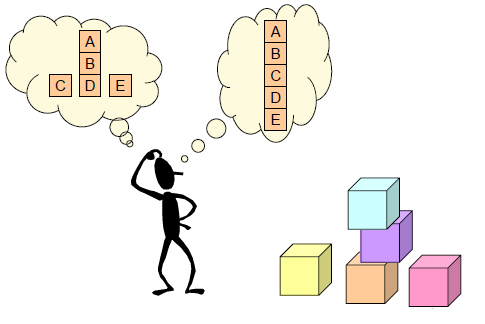

# 2. Descripcion del algoritmo

Para ordenar el arreglo mediante el BucketSort lo que hacemos es:

Tenemos un arreglo de n elementos

1.Se divide el arreglo en n intervalos de igual tamaño a los cuales se les llama Buckets, estos buckets son subarreglos los cuales tienen cierto rango.

2.Se recorre el arreglo y se colocan los numeros en su bucket correspondiente, dependiendo del intervalo de numeros en cada bucket. Porjemplo si los buckets estan en intervalos de 10 en 10 seria el primer bucket del 1 al 9, el segundo del 10 al 19, el tercero del 20 al 21, etc 

3.Se le aplica un algoritmo de ordenamiento a cada bucket en este caso el InsertionSort.

4.Despues de tener todos nuestros buckets con los numeros ordenados, unimos todos los subarreglos en un solo arreglo el cual quedaria ordenado de menor a mayor.



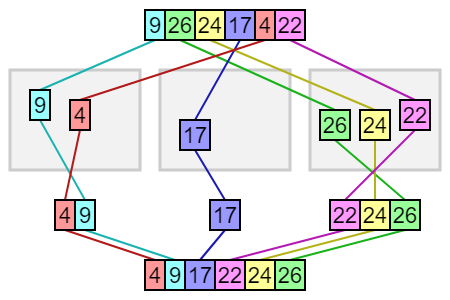

## 2.1 Codigo

In [72]:
def insertionSort(b):
    for i in range(1, len(b)):
        up = b[i]
        j = i - 1
        while j >= 0 and b[j] > up: 
            b[j + 1] = b[j]
            j -= 1
        b[j + 1] = up     
    return b 
    
              
def bucketSort(array, verbose=False):
  arr = []
  buckets = 10 #cantidad de buckets
  if (verbose==True):
    print("Array de entrada:", array)
  for i in range(buckets):
    arr.append([])
           
  for j in array:
    index_b = int(buckets * j) 
    arr[index_b].append(j)

  if (verbose==True):
    print("buckets creados con sus digitos respectivos :")
    print("\n", arr)

      
 
  for i in range(buckets):
    arr[i] = insertionSort(arr[i])
  if (verbose==True):
    print("\n Se le aplica el insertion a los subarreglos (buckets)") 
    print("\n", arr)       
    
  k = 0
  for i in range(buckets):
    for j in range(len(arr[i])):
      array[k] = arr[i][j]
      k += 1
  if (verbose==True):
    print("\n Se juntan los buckets en un solo arreglo ya ordenado") 
    print("\n", array)    
  return array
  
# Driver Code
array = [0.23, 0.10, 0.12, 0.20, 0.15] 
print("Arreglo de entrada", array)
print("Arreglo ordenado", bucketSort(array))

Arreglo de entrada [0.23, 0.1, 0.12, 0.2, 0.15]
Arreglo ordenado [0.1, 0.12, 0.15, 0.2, 0.23]


## 2.2 Ejemplo

Consideremos el siguiente arreglo

arr=[0.10, 0.23, 0.22, 0.13, 0.11, 0.25]

Tenemos un array de n elementos. Se crean los buckets por rango, en este caso tedriamos 2 buckets uno en el rango del [0.1-0.19...] y otro en el rango de [0.2-0.29...]
por lo tanto nos quedaria:

b1=[0.10, 0.13, 0.11]

b2=[0.23, 0.22, 0.25]

A estos 2 subarreglos le aplicamos un algoritmo de ordenamiento el cual nos ordena de menor a mayor y nos quedaría como resultado:

b1=[0.10, 0.11, 0.13]

b2=[0.22, 0,23, 0.25]

Luego unimos estos buckets ya ordenados, como reultado tendriamos el arreglo principal ordenado de menor a mayor:

arr=[0.10, 0.11, 0.13, 0.22, 0.23, 0.25]





## 2.3 Ejecucion del algoritmo paso a paso (verbose=True)

In [73]:
array = [0.23, 0.14, 0.12, 0.20, 0.15]
array = bucketSort(array, verbose=True)
print("\n")


Array de entrada: [0.23, 0.14, 0.12, 0.2, 0.15]
buckets creados con sus digitos respectivos :

 [[], [0.14, 0.12, 0.15], [0.23, 0.2], [], [], [], [], [], [], []]

 Se le aplica el insertion a los subarreglos (buckets)

 [[], [0.12, 0.14, 0.15], [0.2, 0.23], [], [], [], [], [], [], []]

 Se juntan los buckets en un solo arreglo ya ordenado

 [0.12, 0.14, 0.15, 0.2, 0.23]




# **3. CORRECTITUD**

## **3.1 Insertion Sort**

El algoritmo *insertion sort* ordenado dentro del mismo arreglo los elementos, sin la necesidad de crear un auxiliar.

## Prueba del Teorema

Previamente observamos que en cada iteración agregamos un nuevo elemento y lo insertamos en la posición correspondiente.

Para probarlo utilizaremos la **propiedad invariante de bucle**:

- El arreglo que utilizamos para realizar el algoritmo, contiene los mismos elementos, ya que sólo se mueven durante la ejecución pero no cambian. 

> **Incialización:** Al comienzo de la primera iteración, los datos desde la posición 0 hasta i-1 cumplen la propiedad ya que estos no cambian en el proceso.
>
> **Mantención:** En cada iteración se cumple la propiedad, ya que los elementos siguen siendo los mismos con la diferencia de que están en distinto orden, es decir los elementos mayores del arreglo están ordenados de mayor a menor.

## **3.2 Bucket Sort**

Para poder probar la correctitud del bucket sort, utilizaremos **inducción matemática**, para probarla debemos:

1. Probar $P(n)$ para un caso base, por ejemplo $P(1)$

2. Probar que si $P(m)$ es cierto $m < n$, entonces $P(n)$ también lo es.

> **Caso Base:** Van haber casos en los que el bucket tendrá sólo un elemento, por lo que se asume que están ordenados, además que los buckets contendrán elementos menores a los buckets que le siguen.
>
> **Caso Promedio:** Por lo que para $P(m)$ al utilizar insertionSort nos aseguramos que los buckets contienen los mismo elementos pero ordenados de menor a mayor.
ahí está pero revisen bien su código si cumple con las condiciones q puse
eso:p


# **4. TIEMPO DE EJECUCIÓN**

## **4.1 INSERTION SORT**

> **Mejor caso:** Corresponde cuando el arreglo está ordenado, ejecutándose el ciclo únicamente n veces (n = total de elementos), sin necesidad de intercambiar posiciones, ya que sólo recorre una vez.
>
> $$T(n) = O(n)$$
>
> **Caso promedio:** Este se da cuando los elementos no están en orden ascendiente ni descendiente.
>
> $$T(n) = O(n^2)$$
>
> **Peor caso:** Este sucede cuando los elementos están ordenados de manera contraria a como serán ordenados, cada elemento tendrá que ser comparado con todos los elementos anteriores.
>
> $$T(n) = O(n^2)$$

## **4.2 BUCKET SORT**

Excluyendo el tiempo tomado por el insertion sort, bucket sort toma tiempo lineal. Así debemos cuantificar cuanto tiempo toman las n llamadas a insertion sort.

![image](https://i.imgur.com/tnKDYsv.jpg)

Pero, dependiendo el caso, no tienen la misa complejidad:

> **Mejor Caso:** El promedio y el mejor caso corresponde al mismo tiempo de ejecución. Corresponde cuando los elementos están distribuidos aleatoriamente, así dando resultados muy eficientes.
> $$T(n) = O(n + k)$$
>
> Donde n corresponde al número de elementos y k el rango de valores.
>
> **Peor Caso:** El peor caso se produce cuando muchos elementos están muy cerca y se agrupan en el mismo bucket. Esto elimina todas las ventajas de dividir las entradas en cubos.
> $$T(n) = O(n^2)$$
>
> Donde n corresponde al número de elementos.

# 5. Experimentacion

5.1 RadixSort VS BucketSort

In [75]:
def countingSort(arr, exp1):
 
    n = len(arr)
    output = [0] * (n)
    count = [0] * (10)
    for i in range(0, n):
        index = arr[i] // exp1
        count[index % 10] += 1
    for i in range(1, 10):
        count[i] += count[i - 1]

    i = n - 1
    while i >= 0:
        index = arr[i] // exp1
        output[count[index % 10] - 1] = arr[i]
        count[index % 10] -= 1
        i -= 1

    i = 0
    for i in range(0, len(arr)):
        arr[i] = output[i]

def radixSort(arr):
    max1 = max(arr)
    exp = 1
    while max1 / exp >= 1:
        countingSort(arr, exp)
        exp *= 10

arr = [170, 45, 75, 90, 802, 24, 2, 66]
radixSort(arr)
 
for i in range(len(arr)):
    print(arr[i],end=" ")
 

2 24 45 66 75 90 170 802 

In [100]:
import random

def bucketSortInt(arr):
    max_ele = max(arr)
    buckets = 10
    min_ele = min(arr)
    rng = (max_ele - min_ele) / buckets
  
    temp = []
  
    for i in range(buckets):
        temp.append([])

    for i in range(len(arr)):
        diff = (arr[i] - min_ele) / rng - int((arr[i] - min_ele) / rng)
  
        if(diff == 0 and arr[i] != min_ele):
            temp[int((arr[i] - min_ele) / rng) - 1].append(arr[i])
  
        else:
            temp[int((arr[i] - min_ele) / rng)].append(arr[i])
 
    for i in range(len(temp)):
        if len(temp[i]) != 0:
            temp[i].sort()

    k = 0
    for lst in temp:
        if lst:
            for i in lst:
                arr[k] = i
                k = k+1

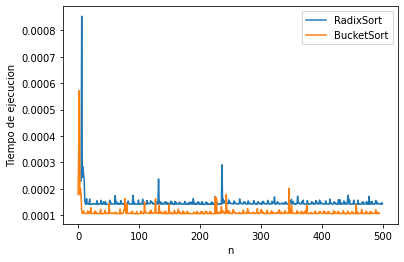

In [102]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random

x=[]; y=[]; z=[]

for n in range(5,500):

  a = [23, 22, 10, 34, 35, 67, 58]

  t = repeat(setup="from __main__ import radixSort", stmt=f"radixSort({a})", repeat=1, number=10)
  v = repeat(setup="from __main__ import bucketSortInt", stmt=f"bucketSortInt({a})", repeat=1, number=10)
  x.append(n)
  y.append(t)
  z.append(v)


plt.plot(x,y,z)
plt.legend(["RadixSort","BucketSort"])

plt.xlabel('n')
plt.ylabel('Tiempo de ejecucion')
plt.show()

### 5.1.1 Analisis de Resultados

Podemos concluir que entre el radixsort y el bucketsort, el radix tiene un mayor tiempo de ejecusion que el bucket pero aun asi ambos tienen un funcionamiento del tiempo de ejecucion muy similar 

## 5.2 CountingSort VS BucketSort

In [112]:
def countSort(arr):
    max_element = int(max(arr))
    min_element = int(min(arr))
    range_of_elements = max_element - min_element + 1

    count_arr = [0 for _ in range(range_of_elements)]
    output_arr = [0 for _ in range(len(arr))]

    for i in range(0, len(arr)):
        count_arr[arr[i]-min_element] += 1

    for i in range(1, len(count_arr)):
        count_arr[i] += count_arr[i-1]

    for i in range(len(arr)-1, -1, -1):
        output_arr[count_arr[arr[i] - min_element] - 1] = arr[i]
        count_arr[arr[i] - min_element] -= 1

    for i in range(0, len(arr)):
        arr[i] = output_arr[i]
 
    return arr

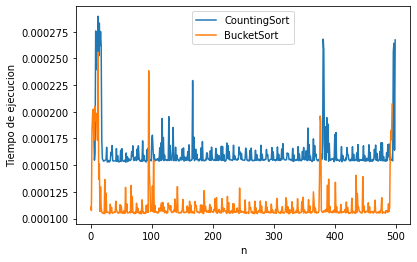

In [114]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random

x=[]; y=[]; z=[]

for n in range(5,500):

  a = [23, 22, 10, 34, 35, 67, 58]

  t = repeat(setup="from __main__ import countSort", stmt=f"countSort({a})", repeat=1, number=10)
  v = repeat(setup="from __main__ import bucketSortInt", stmt=f"bucketSortInt({a})", repeat=1, number=10)
  x.append(n)
  y.append(t)
  z.append(v)


plt.plot(x,y,z)
plt.legend(["CountingSort","BucketSort"])

plt.xlabel('n')
plt.ylabel('Tiempo de ejecucion')
plt.show()

### 5.2.1 Analisis de resultados

Podemos darnos cuenta con el grafico que el tiempo de ejecucion del countingsort es bastante mayor al del bucketSort por lo tanto el bucketSort nos seria mas eficiente